In [1]:
import pandas as pd
import datetime as dt

In [2]:
fi_data=pd.read_csv('aviation-occurrence-repo.csv',header=0)

In [3]:
se_data=pd.DataFrame([{'year':'2023','incidents':55,'year_days':365},
                      {'year':'2024','incidents':495,'year_days':366},
                      {'year':'2025','incidents':733,'year_days':120}],#4 months, Jan to Apr
                     index=[0,1,2])

In [32]:
(fi_data
 .rename(columns={'2024*':'2024','Category':'month'})
 .set_index('month')
 .stack()
 .swaplevel()
 #.sort_index(level=-1)
 .drop(index=('2025', 'May'))
 .drop(index=('2025', 'June'))
 .drop(index=('2025', 'July'))
 .drop(index=('2025', 'August'))
 .unstack().T
 .sum()
 .reset_index()
 .rename(columns={'index':'year',0:'fi_incidents'})
 .set_index('year')
)

,fi_incidents
year,
2022,61.0
2023,236.0
2024,2801.0
2025,497.0


<Axes: xlabel='year'>

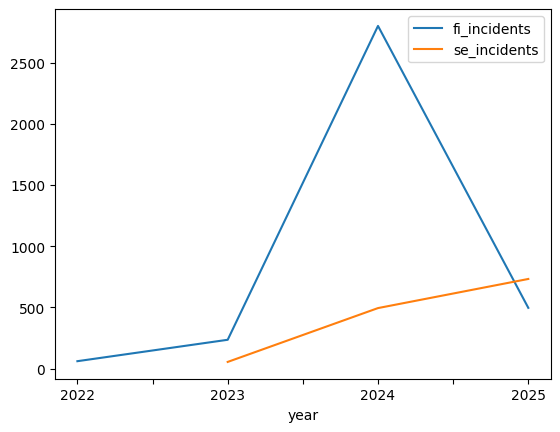

In [33]:
(fi_data
 .rename(columns={'2024*':'2024','Category':'month'})
 .set_index('month')
 .stack()
 .swaplevel()
 #.sort_index(level=-1)
 .drop(index=('2025', 'May'))
 .drop(index=('2025', 'June'))
 .drop(index=('2025', 'July'))
 .drop(index=('2025', 'August'))
 .unstack().T
 .sum()
 .reset_index()
 .rename(columns={'index':'year',0:'fi_incidents'})
 .set_index('year')
 .merge(se_data
     .set_index('year')
    #.assign(disturbances_Sweden_weighted=se_data.set_index('year').incidents.div(se_data.set_index('year').year_days)*365)
    .drop(columns='year_days')
    .rename(columns={'incidents':'se_incidents'}),
    left_index=True, right_index=True,how='outer')
.plot()
)